<p style="text-align:center; color:navy; font-size: 15px;">
  Creado por <strong><em>Klissmann Anaclerio.</em></strong><br>
  Se prohíbe la distribución sin autorización.
</p>


<p style="text-align:center; color: #2C3E50; font-size: 25px;">
  Datamining <span style="color:#E74C3C;">#3</span> News:
</p>

<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  El siguiente paso sería realizar un web scraping del sitio web de PanamaAmerica, específicamente de la sección política, para recopilar 800 artículos de noticias. Los datos extraídos incluyen el título, la descripción, la fecha de publicación, la hora y el autor (si está disponible). Después de recopilar los datos, se guardarán en un archivo CSV y luego se cargarán en una base de datos MySQL utilizando Python. Finalmente, se generará una nube de palabras basada en los títulos y descripciones de los artículos de noticias.
</p>



<p style="font-size: 16px; color: #dc3545; font-weight: bold; margin-bottom: 10px;">
  Advertencia:
</p>

<p style="font-size: 16px; color: #444; margin-bottom: 10px; line-height: 1.5;">
  Este código debe ser utilizado con RESPONSABILIDAD y ÉTICA. El uso de este código podría llevar a ser baneado del sitio web e incluso podría ser interpretado como un ataque DDOS.
</p>



<p style="font-weight: bold; font-size: 16px;">Información del Sistema:</p>
<ul>
  <li>Windows 11 como sistema operativo.</li>
  <li>Archivo CSV cargado en el motor MySQL 8.0.40.</li>
  <li>Python 3.12</li>
</ul>


<p style="font-weight: bold; font-size: 15px;">Librerias para Python</p>

from scrapy.item import Field, Item

from scrapy.spiders import CrawlSpider, Rule

from scrapy.linkextractors import LinkExtractor

from scrapy.loader import ItemLoader

from scrapy.crawler import CrawlerProcess

from itemloaders.processors import MapCompose

<p style="font-weight: bold; font-size: 15px;">Codigo Python</p>

from scrapy.item import Field, Item

from scrapy.spiders import CrawlSpider, Rule

from scrapy.linkextractors import LinkExtractor

from scrapy.loader import ItemLoader

from scrapy.crawler import CrawlerProcess

from itemloaders.processors import MapCompose



class News(Item):

    title = Field()

    date_published = Field()

    by = Field()

    time = Field()

    description = Field()


class DetailNews(CrawlSpider):

    name = 'Panama_America'

    custom_settings = {

        'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',

        'FEED_FORMAT': 'csv',

        'FEED_URI': 'pananamerica_politica.csv',

        'CLOSESPIDER_PAGECOUNT': 800,

        'FEED_EXPORT_ENCODING': 'utf-8'

    }

    download_delay = 1

    allowed_domains = ['panamaamerica.com.pa']

    start_urls = ['https://www.panamaamerica.com.pa/politica']

    rules = (

        Rule(

            LinkExtractor(allow = r'page='),

            follow = True

        ),

        Rule(

            LinkExtractor(allow = r'politica/'),

            follow = True,

            callback="new_extractor"

        ),

    )

    def new_extractor(self,response):
        
        item= ItemLoader(News(), response)

        item.add_xpath('title', './/h1[@id="page-title"]/text()', 
                       MapCompose(lambda x: x.replace('\n', '').replace('\r', '').replace('\t', '').strip()) )

        item.add_xpath('date_published', './/div[@class="grid-x col s12 m12 l12"]/div[1]/text()',
                       MapCompose(lambda x: x.split(' ')[1].strip()))

        item.add_xpath('by', './/ul[@class="autor inline-list left "]/li[1]/text()', 
               MapCompose(
                         lambda x: x.split('/')[0].split('@')[0].split(':')[0].strip().rstrip(',')
                        ))

        item.add_xpath('time', '//div[@class="grid-x col s12 m12 l12"]/div[1]/text()',
                       MapCompose(lambda x: x.split(' ')[2].strip()))

        item.add_xpath('description', './/div[@class="large-12 medium-12 small-12 columns"]/p/text()', MapCompose(
            lambda x: x.replace('\n', '').replace('\r', '').replace('\t', '').strip()))


        yield item.load_item()


process = CrawlerProcess()

process.crawl(DetailNews)

process.start()


<p style="font-weight: bold; font-size: 15px;">Explicación:</p>
<p>En el código Python proporcionado, se realizan los siguientes pasos:</p>

<ul>
    <li><strong>Definición del ítem 'News':</strong> El código comienza definiendo un ítem llamado 'News', que sirve como una estructura para almacenar los datos extraídos del sitio web de noticias. Incluye campos como 'title', 'date_published', 'by', 'time' y 'description'.</li>
    <li><strong>Configuración del Spider ('DetailNews'):</strong> El spider 'DetailNews' es responsable de rastrear la sección de política del sitio web Panamá América. Comienza desde una URL específica y sigue los enlaces para recopilar los artículos de noticias.</li>
    <li><strong>Configuración de Ajustes Personalizados:</strong> El spider utiliza ajustes personalizados, como:
        <ul>
            <li>Agente de usuario para simular un navegador y evitar la detección.</li>
            <li>Formato y ubicación de exportación para los datos (archivo CSV llamado 'pananamerica_politica.csv').</li>
            <li>Un límite en la cantidad de páginas a rastrear (800 páginas o 800 noticias).</li>
            <li>Codificación UTF-8 para manejar caracteres especiales.</li>
        </ul>
    </li>
    <li><strong>Definición de Reglas de Rastreo:</strong> Dos reglas guían al spider:
        <ul>
            <li>La primera regla permite seguir los enlaces de paginación (URLs que contienen 'page=').</li>
            <li>La segunda regla sigue los enlaces que contienen 'politica/' y extrae los detalles de las noticias utilizando el callback 'new_extractor'.</li>
        </ul>
    </li>
    <li><strong>Extracción de Datos:</strong> El método 'new_extractor' utiliza expresiones XPath para extraer detalles específicos de cada página de noticias:
        <ul>
            <li><strong>Título:</strong> Extrae y limpia el encabezado principal del artículo.</li>
            <li><strong>Fecha de Publicación:</strong> Extrae la fecha de publicación desde un elemento HTML específico.</li>
            <li><strong>Por:</strong> Extrae el autor o fuente de la noticia, eliminando texto innecesario.</li>
            <li><strong>Hora:</strong> Extrae la hora de publicación desde el mismo elemento que la fecha.</li>
            <li><strong>Descripción:</strong> Extrae el contenido principal o resumen del artículo.</li>
        </ul>
    </li>
    <li><strong>Procesamiento de los Datos:</strong> Los datos extraídos se procesan y almacenan en el ítem 'News', asegurándose de que estén limpios y formateados antes de guardarlos.</li>
    <li><strong>Proceso del Crawler:</strong> El crawler se inicia usando 'CrawlerProcess', que ejecuta el spider y guarda los datos en el archivo CSV especificado.</li>
</ul>


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  El siguiente paso sería crear una tabla en la base de datos para incluir toda la información recopilada del sitio web.
</p>


<div style="background-color: #f9f9f9; padding: 15px; border-radius: 8px; font-family: 'Courier New', monospace; border: 1px solid #ddd;">
    <pre><code style="color: darkblue; font-size: 16px;">
CREATE TABLE news (
    `by` VARCHAR(255) DEFAULT NULL,         -- Author of the news (can be NULL)
    date_published DATE,                    -- Publication date
    description TEXT DEFAULT NULL,          -- Description of the news (can be NULL)
    time TIME,                              -- Time of the news (in 24-hour format)
    title TEXT                              -- Title of the news
);
</code></pre>
</div>

<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  Es hora de insertar los datos de pananamerica_politica.csv en una base de datos MySQL usando Python.
</p>


In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error


csv_file = 'pananamerica_politica.csv'
df = pd.read_csv(csv_file)

credentials = {}
with open('key.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        credentials[key] = value


try:
    connection = mysql.connector.connect(
    host=credentials['host'],
    user=credentials['user'],
    password=credentials['password'],
    database=credentials['database']
    )

    if connection.is_connected():
        print("Successfully connected to the database.")

        cursor = connection.cursor()

        for index, row in df.iterrows():
            title = row['title']
            description = row['description'] if pd.notna(row['description']) else None
            date_published = row['date_published']
            by = row['by'] if pd.notna(row['by']) else None
            time = row['time']

            query = """
            INSERT INTO news (title, description, date_published, `by`, time)
            VALUES (%s, %s, %s, %s, %s)
            """
            values = (title, description, date_published, by, time)

    
            cursor.execute(query, values)

        connection.commit()
        print("Data successfully inserted into the database.")

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("Connection closed.")


Successfully connected to the database.
Data successfully inserted into the database.
Connection closed.


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  Explicación:
</p>

<p style="font-size: 14px; color: #555;">
  Este código en Python se conecta a una base de datos MySQL e inserta datos desde un archivo CSV en la tabla 'news'. Primero, lee el archivo CSV utilizando la biblioteca pandas y almacena los datos en un DataFrame. Luego, establece una conexión con la base de datos MySQL utilizando la biblioteca 'mysql.connector'. Para cada fila en el DataFrame, el código extrae los valores necesarios (título, descripción, fecha de publicación, autor y hora) y prepara una consulta SQL para insertar los datos en la tabla 'news'. Maneja los valores faltantes verificando si la descripción o el autor están ausentes y asignando 'None' cuando sea aplicable. Después de ejecutar la consulta para todas las filas, los cambios se confirman en la base de datos. Si ocurre algún error durante el proceso, se imprime un mensaje de error. Finalmente, se cierra la conexión a la base de datos.
</p>


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  Hagamos una nube de palabras con los títulos
</p>


Successfully connected to the database.


C:\Users\PythonSQL\AppData\Local\Temp\ipykernel_1068\898562520.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


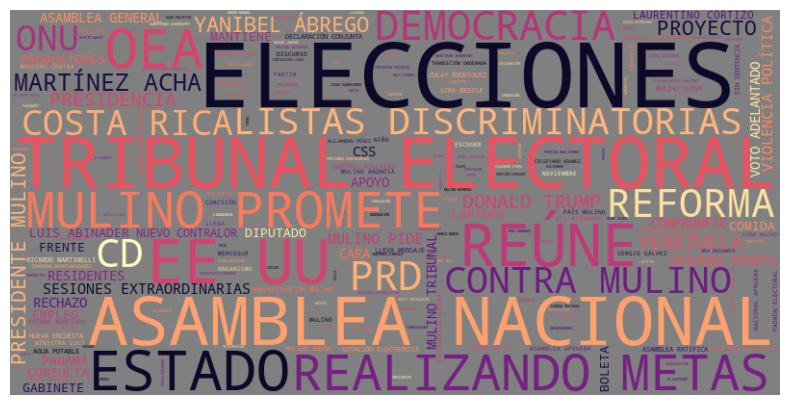

Connection closed.


In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words to exclude (stopwords)
custom_stopwords = set([
    'la', 'el', 'de', 'que', 'y', 'en', 'a', 'con', 'por', 'para', 
    'un', 'una', 'los', 'las', 'del', 'se', 'al', 'es', 'como', 'está', 
    'su', 'más', 'no', ',', 'sobre', 'ser', 'este', 'esta', 'un', 'entre', 
    'todo', 'hace', 'todos', 'muy', 'cuando', 'uno', 'esto', 'donde', 'hacer', ',', 'ser', 'le', 'reitera', 'cuestiona', 'raúl', 'José', 'sus', 'podría',
    'dos'
])


credentials = {}
with open('key.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        credentials[key] = value


try:
    connection = mysql.connector.connect(
    host=credentials['host'],
    user=credentials['user'],
    password=credentials['password'],
    database=credentials['database']
    )

    if connection.is_connected():
        print("Successfully connected to the database.")


        query = "SELECT RTRIM(LTRIM(UPPER(title))) as title FROM news"
        df = pd.read_sql(query, connection)

 
        all_titles = ' '.join(df['title'].dropna())

      
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='grey',
            stopwords=set([word.upper() for word in custom_stopwords]), 
            colormap='magma',  
            contour_width=1,
            contour_color='black'
        ).generate(all_titles)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axes
        plt.show()

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    if connection.is_connected():
        connection.close()
        print("Connection closed.")


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  El siguiente código en Python se conecta a una base de datos MySQL y genera una nube de palabras basada en los títulos de las noticias.
</p>

<p style="font-size: 16px; color: #333;">
  El script comienza importando las bibliotecas necesarias como <code>mysql.connector</code>, <code>pandas</code> y <code>wordcloud</code>. Define un conjunto de palabras vacías personalizadas en español que serán excluidas de la nube de palabras, como palabras comunes como "la", "el", "y", etc. Después de establecer una conexión con la base de datos MySQL, consulta la tabla <code>news</code> para recuperar los títulos de todos los artículos de noticias, convirtiéndolos a mayúsculas para uniformidad. Luego, los títulos se combinan en una sola cadena. Usando la biblioteca <code>WordCloud</code>, el script genera una nube de palabras con un fondo gris y aplica las palabras vacías personalizadas (convertidas a mayúsculas) para excluir palabras comunes. Finalmente, la nube de palabras se muestra usando <code>matplotlib</code> con un contorno negro alrededor de la imagen. La conexión a la base de datos se cierra al final del script.
</p>



Successfully connected to the database.


C:\Users\PythonSQL\AppData\Local\Temp\ipykernel_1068\1577694504.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


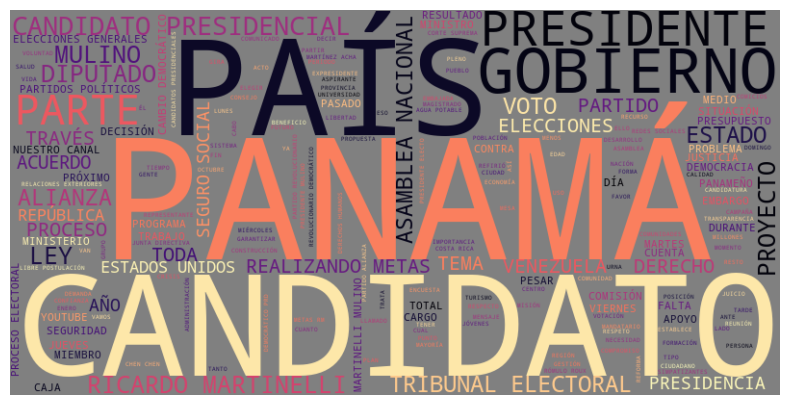

Connection closed.


In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


custom_stopwords = set([
    'la', 'el', 'de', 'que', 'y', 'en', 'a', 'con', 'por', 'para', 
    'un', 'una', 'los', 'las', 'del', 'se', 'al', 'es', 'como', 'está', 
    'su', 'más', 'no', ',', 'sobre', 'ser', 'este', 'esta', 'un', 'entre', 
    'todo', 'hace', 'todos', 'muy', 'cuando', 'uno', 'esto', 'donde', 'hacer', ',', 'ser', 'le', 'reitera', 'cuestiona', 'raúl', 'José', 'sus', 'podría',
    'dos', 'lo', 'dijo', 'expreso', 'tiene', 'agrego', 'quien', 'mi', 'si', 'no', 'sino', 'con', 'segun', 'caso', 'desde', 'pero', 'sin', 'luego', 'vez', 
    'porque', 'debido', 'hay', 'fue', 'otro', 'otros', 'mira', 'ha', 'son', 'estas', 'hasta', 'ellos', 'ni', 'ese', 'esa', 'va', 'mayo', 'junio', 'julio', 'nos', 'tras', 'eso'
    'ya', 'tienen', 'solo'
])



try:
    connection = mysql.connector.connect(
        host='localhost',
        user='kliss',
        password='password',
        database='News'
    )

    if connection.is_connected():
        print("Successfully connected to the database.")

       
        query = "SELECT RTRIM(LTRIM(UPPER(description))) as description FROM news"
        df = pd.read_sql(query, connection)

   
        all_titles = ' '.join(df['description'].dropna())


        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='grey',
            stopwords=set([word.upper() for word in custom_stopwords]),  # Exclude words in custom_stopwords
            colormap='magma',  # You can change the colormap for aesthetics
            contour_width=1,
            contour_color='black'
        ).generate(all_titles)


        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axes
        plt.show()

except Error as e:
    print(f"Error connecting to MySQL: {e}")

finally:
    if connection.is_connected():
        connection.close()
        print("Connection closed.")


<p style="font-size: 16px; color: #333; font-weight: bold; margin-bottom: 10px;">
  El siguiente script en Python se conecta a una base de datos MySQL, recupera las descripciones de los artículos de noticias y genera una nube de palabras excluyendo palabras vacías específicas.
</p>

<p style="font-size: 16px; color: #333;">
  Este script comienza importando las bibliotecas necesarias como <code>mysql.connector</code>, <code>pandas</code> y <code>wordcloud</code>, y define un conjunto personalizado de palabras vacías en español para excluir palabras comunes de la nube de palabras. Luego establece una conexión con una base de datos MySQL y consulta la tabla <code>news</code> para recuperar las descripciones de los artículos, convirtiéndolas a mayúsculas. Las descripciones se concatenan en una sola cadena. La biblioteca <code>WordCloud</code> se utiliza para generar la nube de palabras, aplicando las palabras vacías personalizadas, un fondo gris y un mapa de colores "magma". La nube de palabras se muestra utilizando <code>matplotlib</code>, con los ejes ocultos para una vista más limpia. Finalmente, la conexión a la base de datos se cierra después de mostrar la nube de palabras.
</p>


<p style="text-align:center; color:navy; font-size: 15px;">
  Creado por <strong><em>Klissmann Anaclerio.</em></strong><br>
  Se prohíbe la distribución sin autorización.
</p>
